# All imports necessary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

In [3]:
sys.path.append('..')

In [4]:
from source.code.utils.utils import filter_by_subcorpus
from source.code.utils.utils import get_tagged_texts_as_pd

In [5]:
from source.code.utils.preprocessing import additional_features
from source.code.utils.preprocessing import iob3bio
from source.code.utils.preprocessing import filtrations

In [6]:
import os
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
from tqdm.autonotebook import tqdm

In [10]:
sns.set(color_codes=True)

In [11]:
sns.set(font_scale=2)

In [12]:
%matplotlib inline

# Read the data

## Where are we at the moment

In [13]:
! pwd

C:\Users\Efim_Golovin\Desktop\COURSES\ML\9. NLP\NLP\notebooks


In [14]:
! ls -alth ../data/datasets/gmb-2.2.0/

total 254M
drw-rw-rw-    4 Efim_Golovin 0    0 2018-10-03 16:09 ..
-rw-rw-rw-    1 Efim_Golovin 0 179M 2018-09-27 17:32 en.tags.pd.extracted.csv
drw-rw-rw-    4 Efim_Golovin 0 4.0K 2018-09-27 17:32 .
-rw-rw-rw-    1 Efim_Golovin 0  76M 2018-09-27 11:37 en.raw.extracted.npy
drw-rw-rw-  102 Efim_Golovin 0  12K 2018-09-24 13:22 data
-rw-rw-rw-    1 Efim_Golovin 0 7.4K 2014-07-04 16:12 README
-rw-rw-rw-    1 Efim_Golovin 0 2.0K 2014-07-04 16:06 NEWS
-rw-rw-rw-    1 Efim_Golovin 0  497 2014-07-02 17:09 THANKS
-rw-rw-rw-    1 Efim_Golovin 0  279 2014-06-23 15:24 LICENSE
drw-rw-rw-    2 Efim_Golovin 0    0 2013-08-21 15:16 doc


## Get the subset of folders for target subcorpus (Voice of America)

In [15]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

## Read subcorpus

Let's read the data and take a look at what's happening there:

In [16]:
tagged_texts_as_pd = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

In [17]:
tagged_texts_as_pd.head()

,token,pos_tag,lemma,ner_tag,word_net_sense_number,verb_net_roles,semantic_relation,animacy_tag,super_tag,lambda_dsr
0,Thousands,NNS,thousand,O,1,[],O,Human,N,"lam(v1,b1:drs([],[b1:[1001]:pred(v1,thousand,n..."
1,of,IN,of,O,0,[],O,O,(NP\NP)/NP,"lam(v1,lam(v2,lam(v3,app(v2,lam(v4,app(v1,lam(..."
2,demonstrators,NNS,demonstrator,O,1,[],O,Human,N,"lam(v1,b1:drs([],[b1:[1003]:pred(v1,demonstrat..."
3,have,VBP,have,O,0,[],O,O,(S[dcl]\NP)/(S[pt]\NP),"lam(v1,lam(v2,lam(v3,app(app(v1,v2),lam(v4,mer..."
4,marched,VBN,march,O,1,[Theme],O,O,S[pt]\NP,"lam(v1,lam(v2,app(v1,lam(v3,merge(b1:drs([b1:[..."


In [18]:
tagged_texts_as_pd.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231279 entries, 0 to 1231278
Data columns (total 10 columns):
token                    1231279 non-null object
pos_tag                  1231279 non-null object
lemma                    1231279 non-null object
ner_tag                  1231279 non-null object
word_net_sense_number    1231279 non-null object
verb_net_roles           1231279 non-null object
semantic_relation        1231279 non-null object
animacy_tag              1231279 non-null object
super_tag                1227215 non-null object
lambda_dsr               1227215 non-null object
dtypes: object(10)
memory usage: 93.9+ MB


Let's take a look at what NER-tag we have:

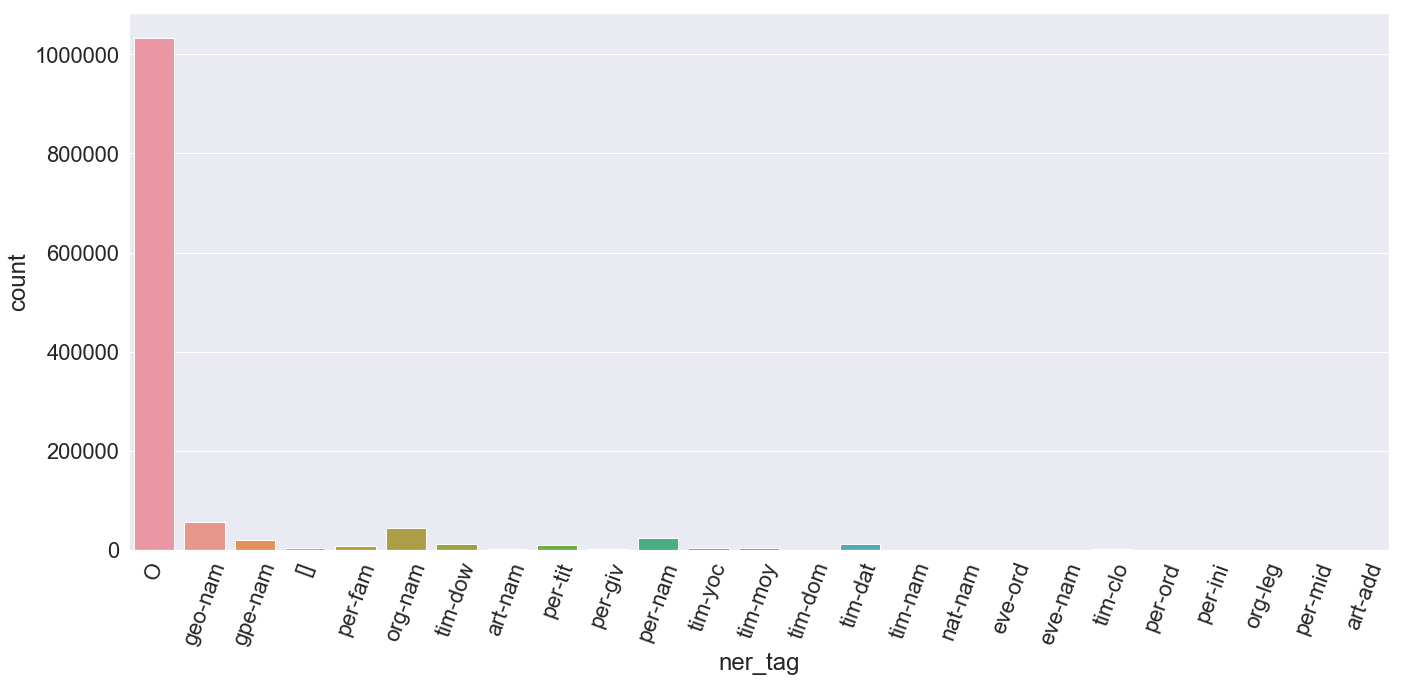

In [19]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

Too many 'O' tags.

Let's try to build a distribution without them:

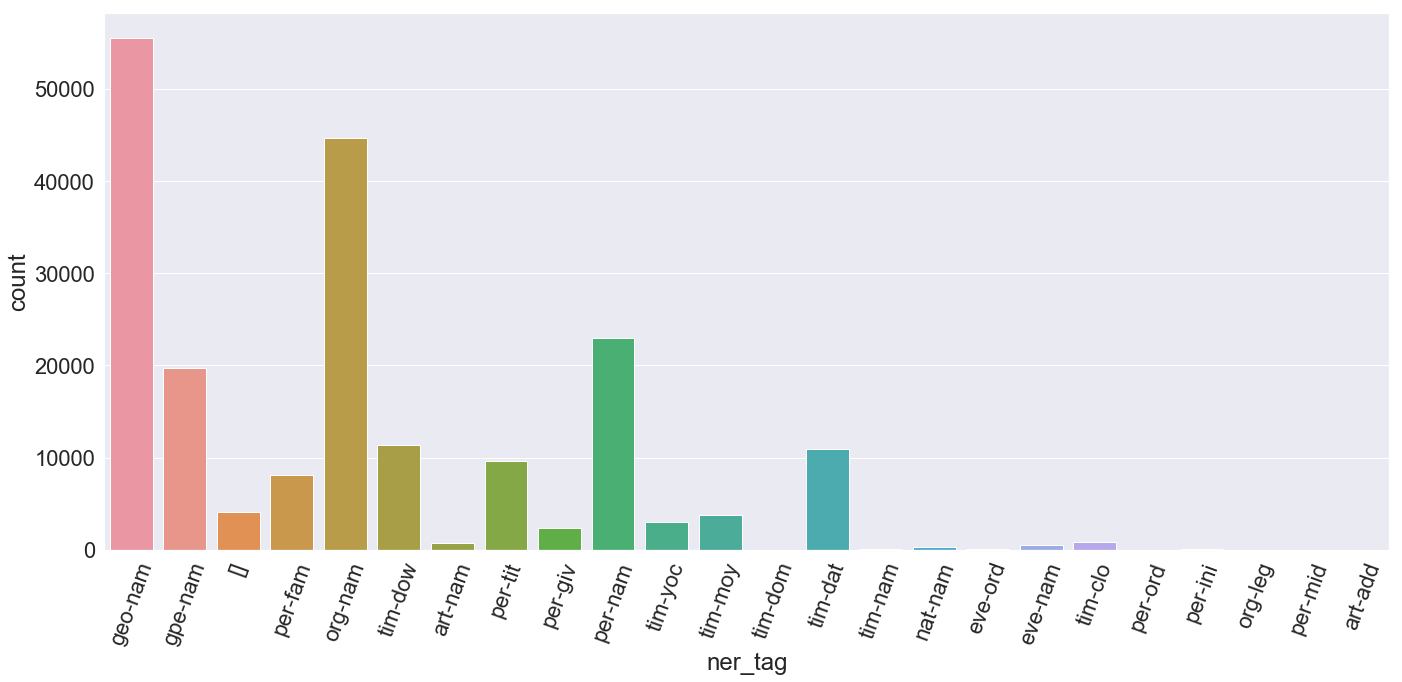

In [20]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

What is the '[]'?

Let's take a look at words whith this tag:

In [21]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].head()

,token,pos_tag,lemma,ner_tag,word_net_sense_number,verb_net_roles,semantic_relation,animacy_tag,super_tag,lambda_dsr
41,\tLQU\t,O,0,[],O,O,NP/NP,"lam(v1,v1)",NaN,NaN
46,\tRQU\t,O,0,[],O,O,NP\NP,"lam(v1,v1)",NaN,NaN
48,\tLQU\t,O,0,[],O,O,(S[dcl]\NP)/(S[dcl]\NP),"lam(v1,v1)",NaN,NaN
53,\tLQU\t,O,0,[],O,O,S[dcl]\S[dcl],"lam(v1,v1)",NaN,NaN
808,\tLQU\t,O,0,[],O,O,NP/NP,"lam(v1,v1)",NaN,NaN


In [22]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].token.value_counts()

\tLQU\t    3025
\tRQU\t    1039
Name: token, dtype: int64

In [23]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].pos_tag.value_counts()

O          3983
org-nam      37
per-nam      27
geo-nam      11
tim-dat       6
Name: pos_tag, dtype: int64

In [24]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].lemma.value_counts()

0    4064
Name: lemma, dtype: int64

Well, seems like it's just some trash.

It will be dropped out of the data in filtration function.

now let's just get rid of it here:

In [25]:
tagged_texts_as_pd = tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != '[]']

Let's also transform our tags into BIO-format:

In [26]:
tagged_texts_as_pd.ner_tag = iob3bio(tagged_texts_as_pd.ner_tag.values)

Okay, hot does it look like now:

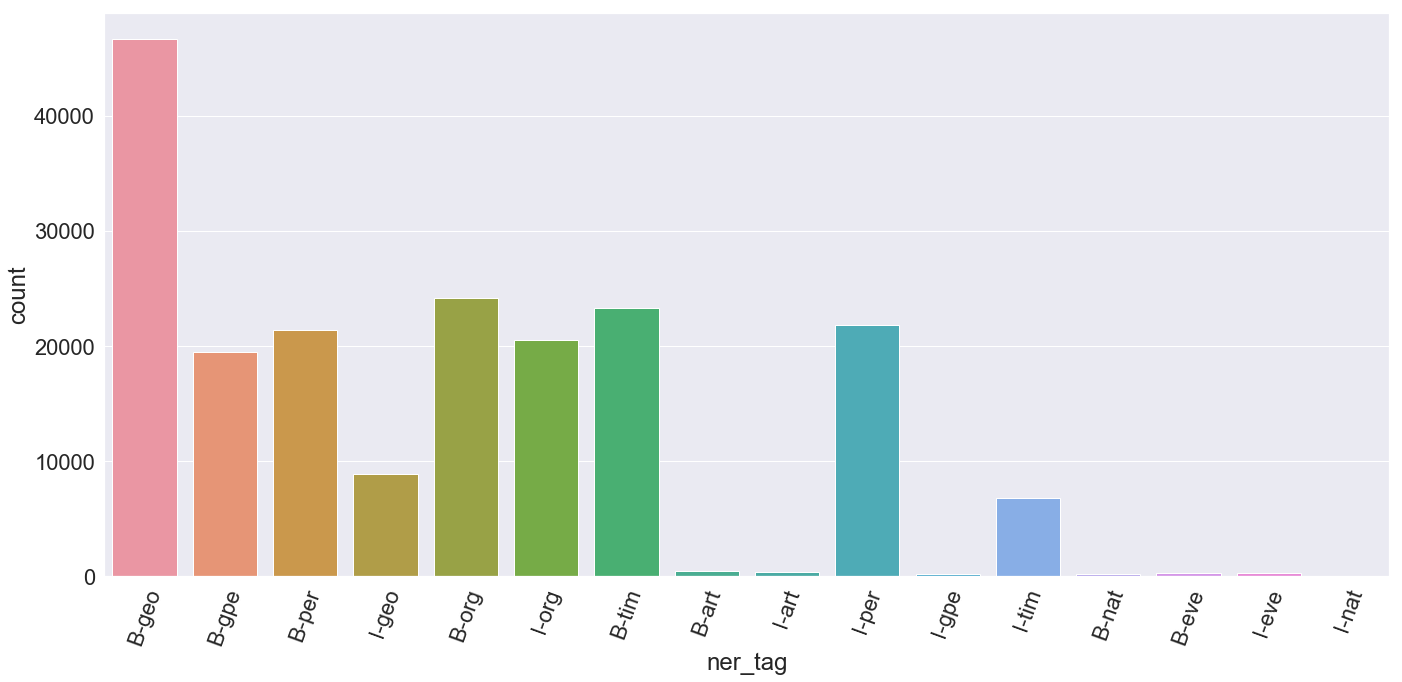

In [27]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

That looks pretty much better.

now let's look at tags with low number of words:

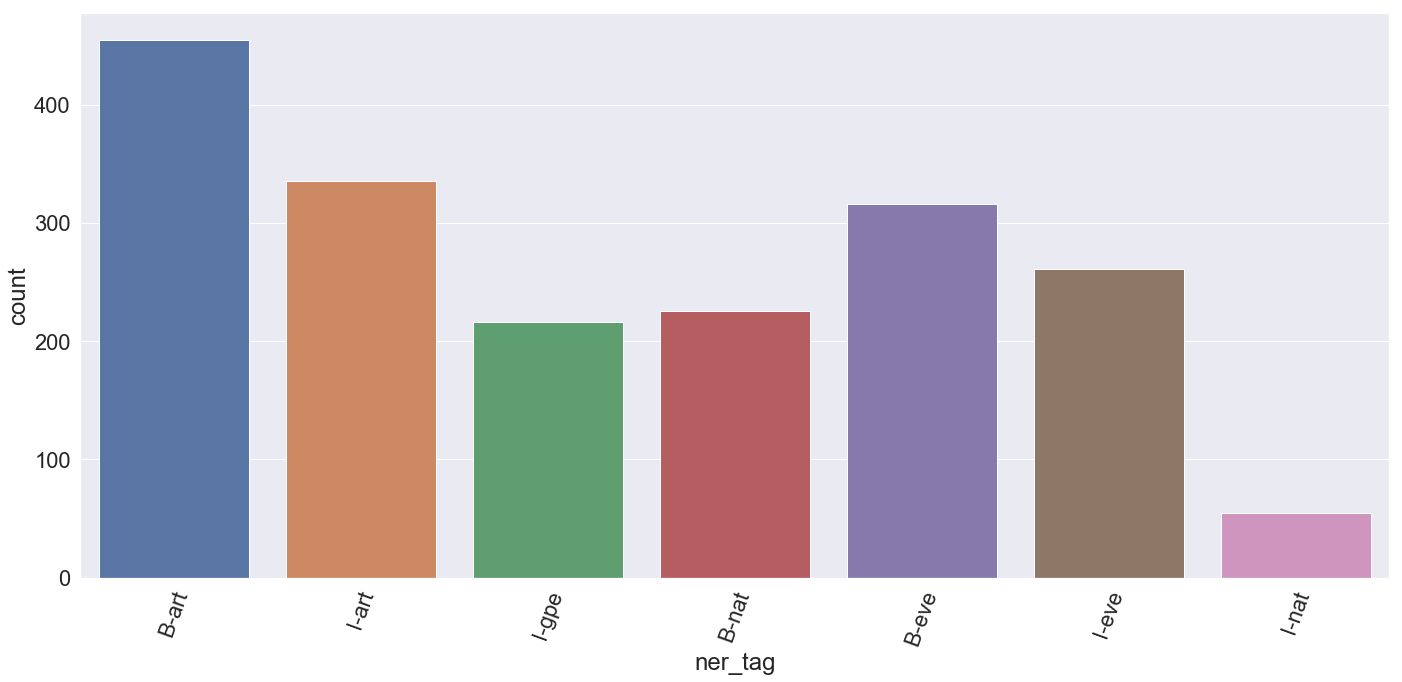

In [28]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag.isin(['B-art', 'I-art', 'I-gpe', 'B-nat', 'B-eve', 'I-eve', 'I-nat'])])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

As it can be seen there is not so much words with these tags.

Also we can notice that the number or GPE-entities composed from several words is very small.

# Tags count per each word

Here the idea is to look at how many tags can be assigned to some particular word.

In [41]:
tags_count_per_word_distribution = tagged_texts_as_pd.groupby('lemma')['ner_tag'].agg(lambda x: list(set(x))).reset_index().rename({'ner_tag': 'tags_list'}, axis=1)

In [42]:
tags_count_per_word_distribution['tags_count'] = tags_count_per_word_distribution.tags_list.apply(len)

In [47]:
tags_count_per_word_distribution.sort_values(by='tags_count', ascending=False).head(20)

,lemma,tags_list,tags_count
17879,of,"[I-gpe, I-tim, I-art, B-org, B-geo, I-org, I-e...",11
10322,france,"[B-per, I-art, B-org, B-geo, I-org, I-geo, B-a...",11
24471,the,"[I-tim, I-art, B-org, B-geo, I-org, I-geo, B-t...",11
23412,state,"[I-gpe, B-per, I-tim, B-org, B-geo, I-org, I-g...",10
18448,pakistan,"[B-per, I-tim, B-org, B-geo, I-org, I-geo, B-e...",10
17356,new,"[I-tim, I-art, B-org, B-geo, I-org, I-geo, B-t...",10
17984,olympics,"[I-tim, B-org, B-geo, I-org, I-geo, B-tim, B-e...",10
9044,england,"[B-per, I-tim, B-org, B-geo, I-org, I-eve, I-g...",10
14,-,"[B-per, I-tim, I-art, B-org, B-geo, I-org, I-g...",10
15319,madrid,"[I-tim, B-org, B-geo, I-org, B-tim, I-geo, B-e...",9


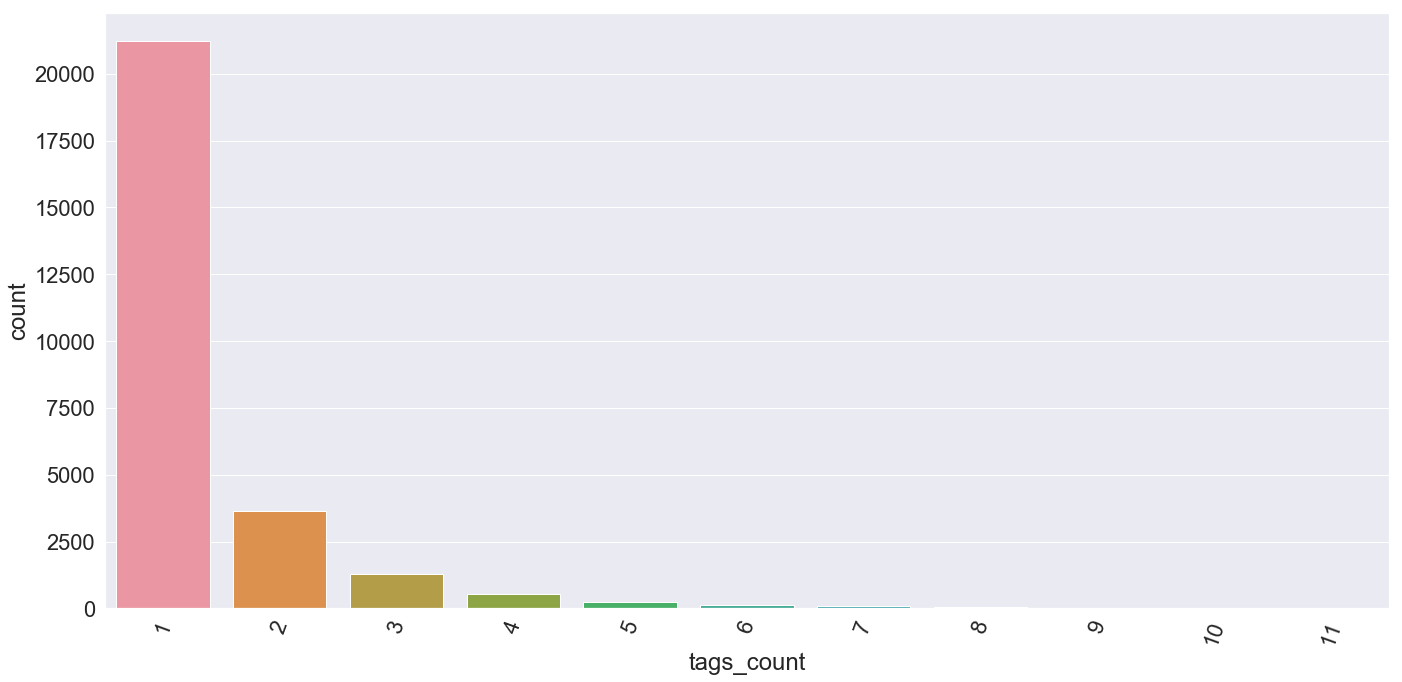

In [43]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('tags_count', data=tags_count_per_word_distribution)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

As we can see the majority of words has only one tag.

But there are also others, let's look at them a bit closer:

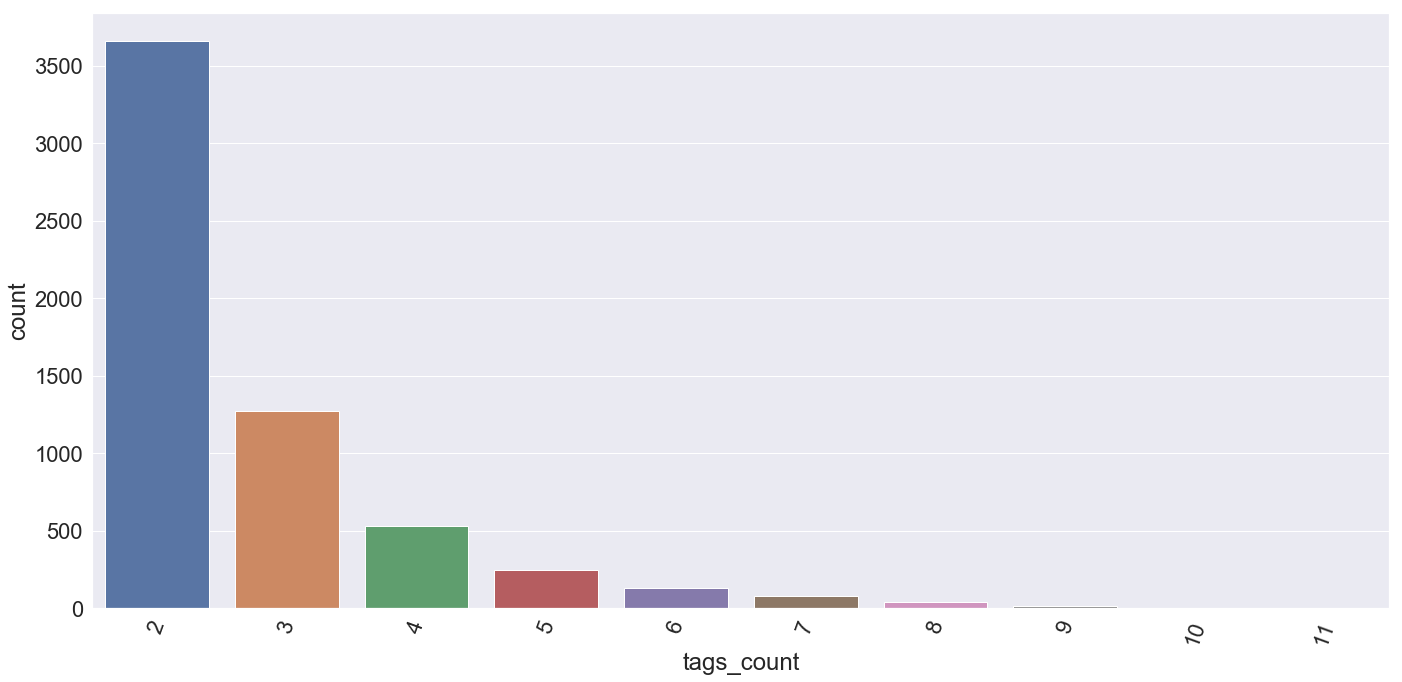

In [44]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('tags_count', data=tags_count_per_word_distribution[tags_count_per_word_distribution.tags_count != 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

## Do a bit of preprocessing

Here (besides what is written on the left side of progress bars) we get rid of:
- English stop-words;
- non-numerical word sense values;
- some trash-values in NER-tag column.

In [ ]:
tagged_texts_as_pd_f = filtrations(tagged_texts_as_pd)

## Add new features describing words

Here we calculate some additional features, namely:
- is the word is titled or not (binary feature);
- whether the word contains ONLY LETTERS or not (binary feature);
- whether the word contains ONLY DIGITS or not (binary feature);
- length of word (numeric feature).

All further investigation will be denoted to investigation of these features.

In [ ]:
tagged_texts_as_pd_f_add_f = additional_features(tagged_texts_as_pd_f)